In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Imports

import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
import cv2

data_dir = "/content/drive/MyDrive/archive (2)/traffic_Data"

def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    # Define the path to the DATA directory

    for class_folder in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_folder)
        if os.path.isdir(class_path):
            for img in os.listdir(class_path):
                img_path = os.path.join(class_path, img)
                img_data = cv2.imread(img_path)
                if img_data is not None:  # Checking if the image is loaded correctly
                    heights.append(img_data.shape[0])
                    widths.append(img_data.shape[1])
                    img_count += 1
    if heights and widths:
        avg_height = sum(heights) / len(heights)
        avg_width = sum(widths) / len(widths)
        print(f"Total Images Processed: {img_count}")
        print(f"Average Height: {avg_height:.2f}")
        print(f"Max Height: {max(heights)}")
        print(f"Min Height: {min(heights)}\n")
        print(f"Average Width: {avg_width:.2f}")
        print(f"Max Width: {max(widths)}")
        print(f"Min Width: {min(widths)}")
    else:
        print("No images found in the specified directory.")


In [3]:
get_size_statistics()

Total Images Processed: 2024
Average Height: 110.09
Max Height: 380
Min Height: 28

Average Width: 115.90
Max Width: 391
Min Width: 26


Class Balance Summary:
Class ID: 0 - Speed limit (5km/h): 118 images
Class ID: 1 - Speed limit (15km/h): 40 images
Class ID: 2 - Speed limit (30km/h): 80 images
Class ID: 3 - Speed limit (40km/h): 260 images
Class ID: 4 - Speed limit (50km/h): 98 images
Class ID: 5 - Speed limit (60km/h): 194 images
Class ID: 6 - Speed limit (70km/h): 108 images
Class ID: 7 - speed limit (80km/h): 162 images
Class ID: 8 - Dont Go straight or left: 8 images
Class ID: 9 - Dont Go straight or Right: 2 images
Class ID: 10 - Dont Go straight: 70 images
Class ID: 11 - Dont Go Left: 138 images
Class ID: 12 - Dont Go Left or Right: 96 images
Class ID: 13 - Dont Go Right: 36 images
Class ID: 14 - Dont overtake from Left: 128 images
Class ID: 15 - No Uturn: 22 images
Class ID: 16 - No Car: 194 images
Class ID: 17 - No horn: 210 images
Class ID: 18 - Speed limit (40km/h): 8 images
Class ID: 19 - Speed limit (50km/h): 4 images
Class ID: 20 - Go straight or right: 18 images
Class ID: 21 - Go straight: 12 images
Cla

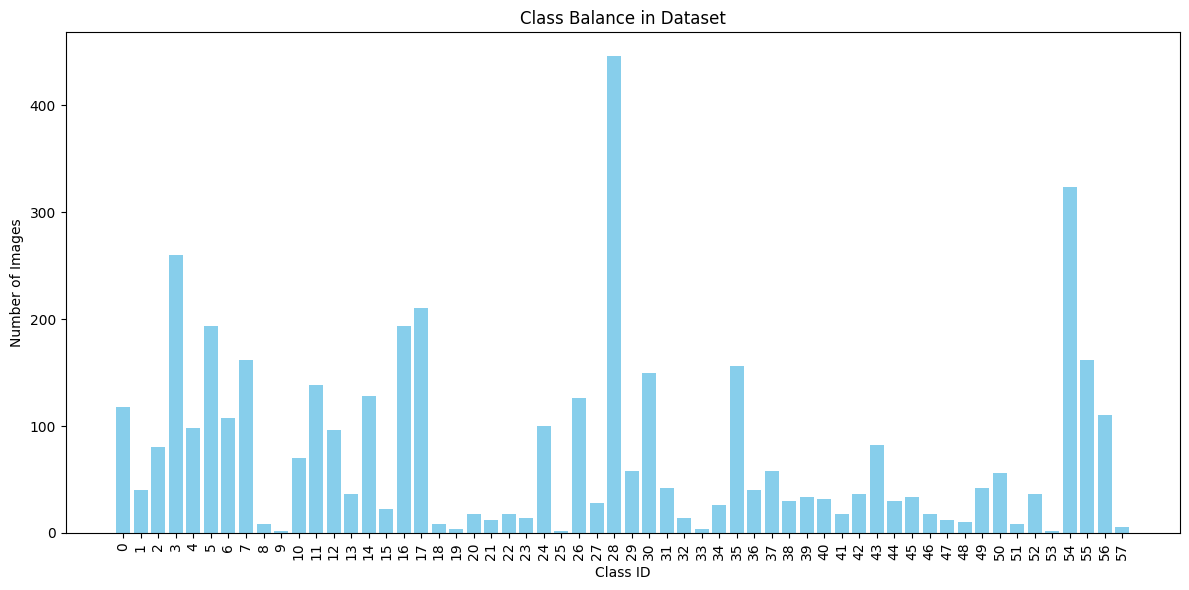

In [4]:
def check_class_balance(data_dir, label_file):
    # Load the labels.csv file
    labels = pd.read_csv(label_file)

    # Dictionary to store image counts for each classid
    class_image_count = {str(class_id): 0 for class_id in labels['ClassId']}

    # Iterate over each subdirectory in DATA
    for class_folder in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_folder)
        if os.path.isdir(class_path) and class_folder in class_image_count:
            image_count = len([img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png'))])
            class_image_count[class_folder] = image_count

    # Display class balance information
    print("Class Balance Summary:")
    for class_id, count in class_image_count.items():
        class_name = labels.loc[labels['ClassId'] == int(class_id), 'Name'].values[0]
        print(f"Class ID: {class_id} - {class_name}: {count} images")

    # Visualize class distribution
    plt.figure(figsize=(12, 6))
    plt.bar(class_image_count.keys(), class_image_count.values(), color='skyblue')
    plt.xlabel('Class ID')
    plt.ylabel('Number of Images')
    plt.title('Class Balance in Dataset')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


data_dir = '/content/drive/MyDrive/archive (2)/traffic_Data/DATA'
label_file = '/content/drive/MyDrive/archive (2)/traffic_Data/labels.csv'
check_class_balance(data_dir, label_file)


In [5]:
data_dir = '/content/drive/MyDrive/archive (2)/traffic_Data/DATA'
label_file = '/content/drive/MyDrive/archive (2)/traffic_Data/labels.csv'

# Load labels.csv
data_labels = pd.read_csv(label_file)

# Image preprocessing parameters
image_size = (64, 64)  # Resize all images to 64x64

# Prepare X_train and y_train as feature and label arrays
image_data = []
labels = []

for class_id in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, class_id)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        for img in images:
            img_path = os.path.join(class_path, img)
            image = cv2.imread(img_path)
            if image is not None:
                resized_image = cv2.resize(image, image_size)  # Resize image
                normalized_image = resized_image / 255.0  # Normalize pixel values to [0, 1]
                image_data.append(normalized_image.flatten())  # Flatten the image into a feature vector
                labels.append(int(class_id))  # Use directory name as class_id

# Convert lists to numpy arrays
X_train = np.array(image_data)
y_train = np.array(labels)



In [6]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.1 MB/s eta 0:00:00


In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# countering before applying SMOTE
counter = Counter(y_train)
print('Before SMOTE:', counter)

# Apply SMOTE for oversampling
smt = SMOTE(k_neighbors=1)  # Use k_neighbors=1 for extremely small classes
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

# countering after applying SMOTE
counter_after = Counter(y_train_sm)
print('After SMOTE:', counter_after)

Before SMOTE: Counter({28: 446, 54: 324, 3: 260, 17: 210, 16: 194, 5: 194, 55: 162, 7: 162, 35: 156, 30: 150, 11: 138, 14: 128, 26: 126, 0: 118, 56: 110, 6: 108, 24: 100, 4: 98, 12: 96, 43: 82, 2: 80, 10: 70, 29: 58, 37: 58, 50: 56, 31: 42, 49: 42, 1: 40, 36: 40, 13: 36, 42: 36, 52: 36, 39: 34, 45: 34, 40: 32, 38: 30, 44: 30, 27: 28, 34: 26, 15: 22, 20: 18, 22: 18, 41: 18, 46: 18, 23: 14, 32: 14, 21: 12, 47: 12, 48: 10, 18: 8, 51: 8, 8: 8, 57: 6, 19: 4, 33: 4, 25: 2, 53: 2, 9: 2})
After SMOTE: Counter({0: 446, 1: 446, 10: 446, 11: 446, 12: 446, 13: 446, 14: 446, 15: 446, 16: 446, 17: 446, 18: 446, 19: 446, 2: 446, 20: 446, 21: 446, 22: 446, 23: 446, 24: 446, 25: 446, 26: 446, 27: 446, 28: 446, 29: 446, 3: 446, 30: 446, 31: 446, 32: 446, 33: 446, 34: 446, 35: 446, 36: 446, 37: 446, 38: 446, 39: 446, 4: 446, 40: 446, 41: 446, 42: 446, 43: 446, 44: 446, 45: 446, 46: 446, 47: 446, 48: 446, 49: 446, 5: 446, 50: 446, 51: 446, 52: 446, 53: 446, 54: 446, 55: 446, 56: 446, 57: 446, 6: 446, 7: 4

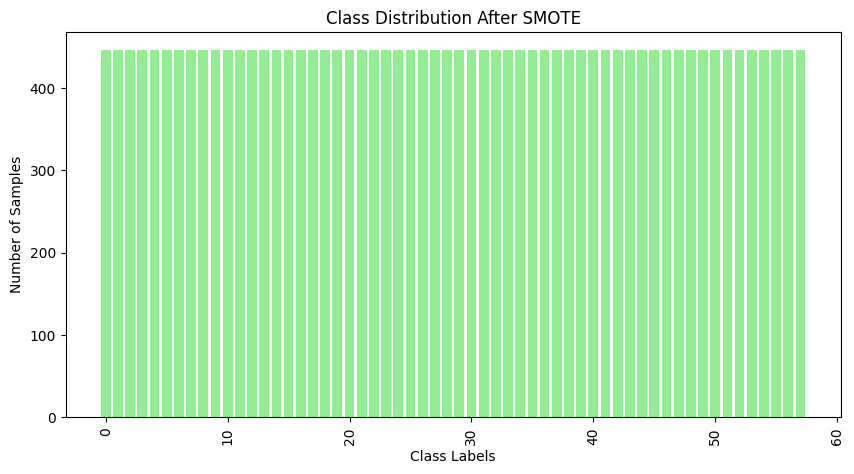

After SMOTE: Counter({0: 446, 1: 446, 10: 446, 11: 446, 12: 446, 13: 446, 14: 446, 15: 446, 16: 446, 17: 446, 18: 446, 19: 446, 2: 446, 20: 446, 21: 446, 22: 446, 23: 446, 24: 446, 25: 446, 26: 446, 27: 446, 28: 446, 29: 446, 3: 446, 30: 446, 31: 446, 32: 446, 33: 446, 34: 446, 35: 446, 36: 446, 37: 446, 38: 446, 39: 446, 4: 446, 40: 446, 41: 446, 42: 446, 43: 446, 44: 446, 45: 446, 46: 446, 47: 446, 48: 446, 49: 446, 5: 446, 50: 446, 51: 446, 52: 446, 53: 446, 54: 446, 55: 446, 56: 446, 57: 446, 6: 446, 7: 446, 8: 446, 9: 446})


In [8]:
# Visualize class distribution after SMOTE
counter_after = Counter(y_train_sm)
plt.figure(figsize=(10, 5))
plt.bar(counter_after.keys(), counter_after.values(), color='lightgreen')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()
print('After SMOTE:', counter_after)


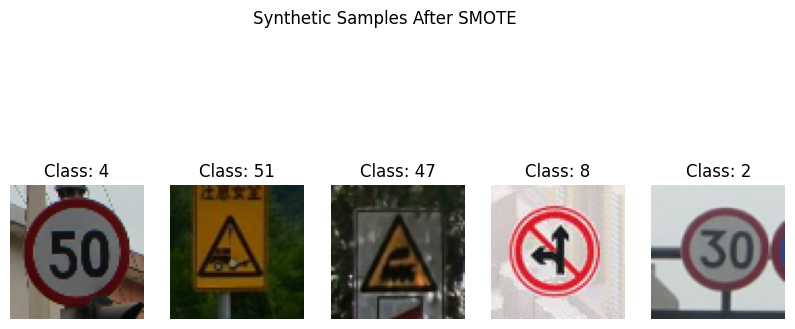

In [9]:
# Visualize some synthetic samples generated by SMOTE
sample_indices = np.random.choice(range(len(X_train_sm)), size=5, replace=False)
plt.figure(figsize=(10, 5))
for i, index in enumerate(sample_indices):
    sample_image = X_train_sm[index].reshape(image_size + (3,)) * 255  # Rescale to [0, 255]
    sample_image = sample_image.astype(np.uint8)
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.axis('off')
    plt.title(f'Class: {y_train_sm[index]}')
plt.suptitle('Synthetic Samples After SMOTE')
plt.show()

In [10]:
# Base directory to store images
output_base_dir = 'traffic_images'
os.makedirs(output_base_dir, exist_ok=True)

# Convert and save images from X_train_sm into separate class directories
image_shape = (64, 64, 3)

# Normalize pixel values for proper scaling
def normalize_and_scale(image_vector):
    image = image_vector.reshape(image_shape)
    image = np.clip(image * 255.0, 0, 255).astype(np.uint8)
    return image

for i, (image_vector, label) in enumerate(zip(X_train_sm, y_train_sm)):
    image = normalize_and_scale(image_vector)  # Reshape and scale
    class_dir = os.path.join(output_base_dir, f'class_{label}')
    os.makedirs(class_dir, exist_ok=True)
    image_path = os.path.join(class_dir, f'image_{i}.png')
    cv2.imwrite(image_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Saving the images in BGR format

print(f"Images saved to directory: {output_base_dir}")


Images saved to directory: traffic_images


In [11]:
import os
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog, local_binary_pattern
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Directory containing 56 subdirectories with images
base_input_dir = '/content/traffic_images'

# Helper function to read and resize images
def load_and_preprocess_images(base_input_dir, resize_shape=(64, 64, 3)):
    images = []
    for class_dir in sorted(os.listdir(base_input_dir)):
        class_path = os.path.join(base_input_dir, class_dir)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image = imread(image_path)
                    image_resized = resize(image, resize_shape)
                    images.append((class_dir, image_resized))
    return images

# Function to extract HOG features
def extract_hog_features(images, resize_shape=(128, 64)):
    hog_images = []
    for class_dir, image in images:
        resized_img = resize(image, resize_shape)
        _, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), visualize=True, channel_axis=-1)
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        hog_images.append((class_dir, hog_image_rescaled))
    return hog_images

# Function to process contours and histograms
def extract_contours_and_histograms(images):
    contour_images = []
    histograms = []
    for class_dir, image in images:
        bgr_image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
        gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

        # Contour detection
        blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
        edges = cv2.Canny(blurred, 50, 150)
        contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contour_image = bgr_image.copy()
        cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 1)
        contour_images.append((class_dir, contour_image))

        # Histogram computation
        histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
        histograms.append((class_dir, histogram))

    return contour_images, histograms

# Function to compute LBP features
def compute_lbp_features(images, radius=1, n_points=8):
    lbp_features_dataset = []
    for class_dir, image in images:
        gray_image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
        lbp = local_binary_pattern(gray_image, n_points, radius, method="uniform")
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        lbp_hist_normalized = lbp_hist / lbp_hist.sum()
        lbp_features_dataset.append((class_dir, lbp_hist_normalized))
    return lbp_features_dataset



In [12]:
# Usage:
images = load_and_preprocess_images(base_input_dir)
hog_images = extract_hog_features(images)
contour_images, histograms = extract_contours_and_histograms(images)
lbp_features = compute_lbp_features(images)


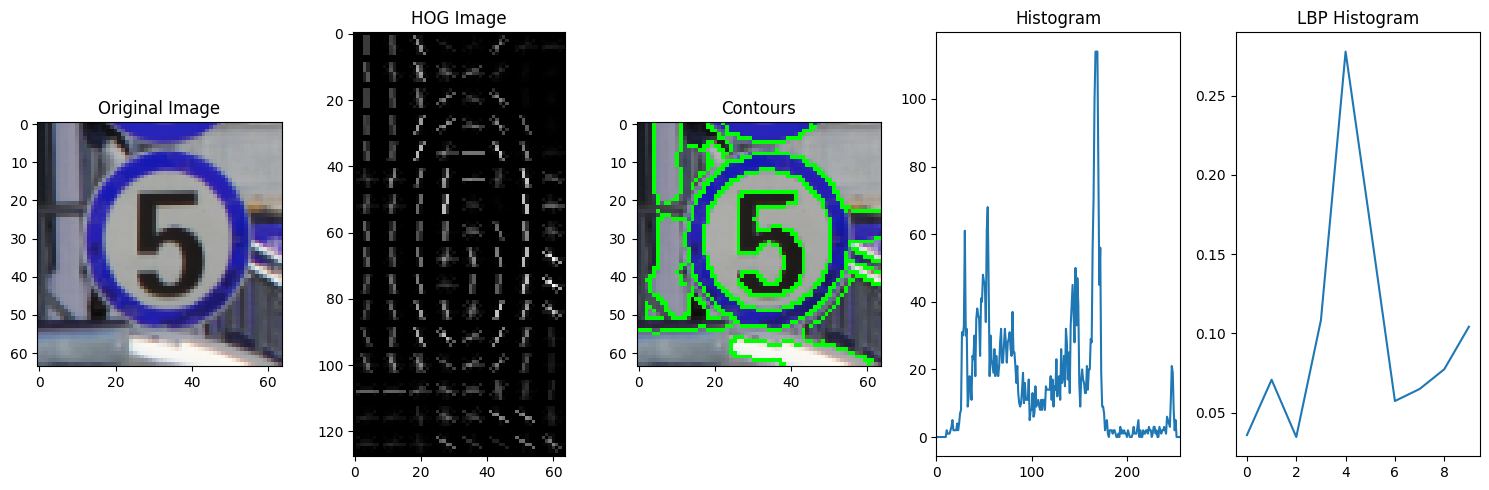

In [13]:
# Visualization for Verification
if images and hog_images and contour_images and histograms and lbp_features:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 5, 1)
    plt.title("Original Image")
    plt.imshow(images[0][1])

    plt.subplot(1, 5, 2)
    plt.title("HOG Image")
    plt.imshow(hog_images[0][1], cmap='gray')

    plt.subplot(1, 5, 3)
    plt.title("Contours")
    plt.imshow(cv2.cvtColor(contour_images[0][1], cv2.COLOR_BGR2RGB))

    plt.subplot(1, 5, 4)
    plt.title("Histogram")
    plt.plot(histograms[0][1])
    plt.xlim([0, 256])

    plt.subplot(1, 5, 5)
    plt.title("LBP Histogram")
    plt.plot(lbp_features[0][1])

    plt.tight_layout()
    plt.show()
